# Load Data

In [10]:
# Data Processing
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('CloudWatch_Traffic_Web_Attack.csv')
print(df.head())



   bytes_in  bytes_out         creation_time              end_time  \
0      5602      12990  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
1     30912      18186  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
2     28506      13468  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
3     30546      14278  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
4      6526      13892  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   

            src_ip src_ip_country_code protocol  response.code  dst_port  \
0   147.161.161.82                  AE    HTTPS            200       443   
1     165.225.33.6                  US    HTTPS            200       443   
2  165.225.212.255                  CA    HTTPS            200       443   
3   136.226.64.114                  US    HTTPS            200       443   
4   165.225.240.79                  NL    HTTPS            200       443   

         dst_ip              rule_names                      observation_name  \
0  10.138.69.97  Suspicious Web Traffic  

# Drop non-numeric and non-relevant columns

In [11]:
df = df.drop(columns=['creation_time', 'end_time', 'dst_ip', 'rule_names','observation_name', 'source.meta', 'source.name', 'time', 'protocol', 'response.code', 'dst_port', 'detection_types'])
# Handle missing values if any
df = df.dropna()
print(df.head())

   bytes_in  bytes_out           src_ip src_ip_country_code
0      5602      12990   147.161.161.82                  AE
1     30912      18186     165.225.33.6                  US
2     28506      13468  165.225.212.255                  CA
3     30546      14278   136.226.64.114                  US
4      6526      13892   165.225.240.79                  NL


# Step 2: Feature Selection For clustering, we will use bytes_diff (diff between bytes_in and bytes_out), src_ip and src_ip_country_code.

In [12]:
df['bytes_diff'] = df['bytes_in'] - df['bytes_out']
df_filtered = df[['bytes_diff', 'src_ip', 'src_ip_country_code']]
print(df.head())

   bytes_in  bytes_out           src_ip src_ip_country_code  bytes_diff
0      5602      12990   147.161.161.82                  AE       -7388
1     30912      18186     165.225.33.6                  US       12726
2     28506      13468  165.225.212.255                  CA       15038
3     30546      14278   136.226.64.114                  US       16268
4      6526      13892   165.225.240.79                  NL       -7366


# Step 3: Normalization

In [13]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_filtered[['bytes_diff']])  # Normalisasi hanya bytes_diff
print(df_scaled)

[[7.01968494e-04]
 [1.55171538e-03]
 [1.64938938e-03]
 [1.70135262e-03]
 [7.02897918e-04]
 [1.03174498e-03]
 [5.29940587e-04]
 [1.90126367e-01]
 [8.03867147e-04]
 [1.15248559e-03]
 [2.04211321e-03]
 [4.93186098e-04]
 [1.99521955e-03]
 [3.33037917e-03]
 [7.09826351e-04]
 [8.25553985e-02]
 [7.65000331e-04]
 [1.10001539e-03]
 [1.91699544e-01]
 [4.73330225e-04]
 [1.10440903e-03]
 [1.51884758e-03]
 [6.92040558e-04]
 [1.59100466e-03]
 [3.01826174e-03]
 [8.62589836e-04]
 [6.78817391e-04]
 [1.10871817e-03]
 [7.40243859e-04]
 [7.33399920e-04]
 [1.07475196e-03]
 [9.95159476e-04]
 [9.68628649e-04]
 [1.64677010e-03]
 [7.71421805e-04]
 [4.74597621e-04]
 [1.66065991e-01]
 [7.42356186e-04]
 [6.99264716e-04]
 [1.02608394e-03]
 [1.34331321e-03]
 [4.42870470e-04]
 [2.58734704e-03]
 [8.28027520e-02]
 [7.04841259e-04]
 [1.99766985e-03]
 [7.08558954e-04]
 [1.89808377e-01]
 [2.26863915e-04]
 [2.06078618e-03]
 [1.03436426e-03]
 [1.90405152e-03]
 [8.61956138e-04]
 [1.15442893e-03]
 [1.91140537e-01]
 [1.162793

# Measurement Silhouette and Calinski Harabasz

In [14]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
# Function to evaluate clustering performance
def evaluate_clustering(X, labels, algorithm_name):
    if len(set(labels)) > 1:  # Check if there's more than one cluster
        silhouette = silhouette_score(X, labels)
        calinski = calinski_harabasz_score(X, labels)
    else:
        silhouette = 0
        calinski = 0
    return silhouette, calinski

# Apply KMeans Clustering

In [15]:
from sklearn.cluster import KMeans
import time
start_time = time.time()
kmeans = KMeans(n_clusters=3)  # cluster=3
df_filtered['kmeans_labels'] = kmeans.fit_predict(df_scaled)
kmeans_time = time.time() - start_time # Execution Time
# print("KMeans time: %s seconds" % kmeans_time)

C:\Users\USERPC\AppData\Local\Temp\ipykernel_14736\1487544153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['kmeans_labels'] = kmeans.fit_predict(df_scaled)


# Apply DBSCAN clustering

In [16]:
from sklearn.cluster import DBSCAN
import time
start_time = time.time()
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_filtered['dbscan_labels'] = dbscan.fit_predict(df_scaled)
dbscan_time = time.time() - start_time # Execution Time
# print("DBSCAN time: %s seconds" % dbscan_time)

# Evaluate Model

In [17]:
# Evaluasi performa clustering Kmeans
silhouette, calinski = evaluate_clustering(df_scaled, df_filtered['kmeans_labels'], "K-Means")
print("Silhouette Score for K-Means:", silhouette)
print("Calinski-Harabasz Index for K-Means:", calinski)

# Evaluasi performa clustering DBSCAN
silhouette, calinski = evaluate_clustering(df_scaled, df_filtered['dbscan_labels'], "DBSCAN")
print("Silhouette Score for DBSCAN:", silhouette)
print("Calinski-Harabasz Index for DBSCAN:", calinski)

# Evaluasi performa waktu Kmeans dan DBSCAN
print("KMeans time: %s seconds" % kmeans_time)
print("DBSCAN time: %s seconds" % dbscan_time)
print("KMeans time > DBSCAN time:", kmeans_time > dbscan_time)

Silhouette Score for K-Means: 0.9496563282575202
Calinski-Harabasz Index for K-Means: 4716.751124643708
Silhouette Score for DBSCAN: 0.9574698230720196
Calinski-Harabasz Index for DBSCAN: 2613.64367513726
KMeans time: 0.01176142692565918 seconds
DBSCAN time: 0.0068399906158447266 seconds
KMeans time > DBSCAN time: True


# Visualization and Comparison

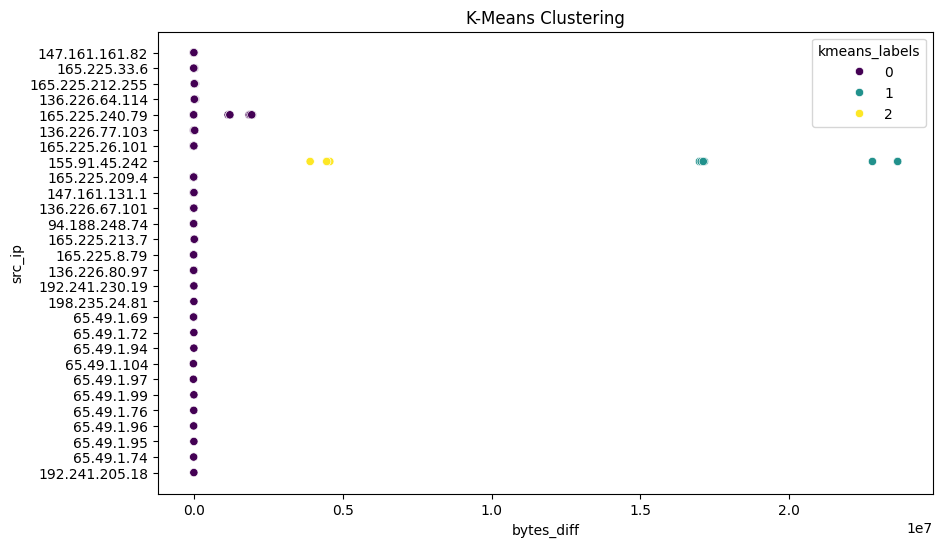

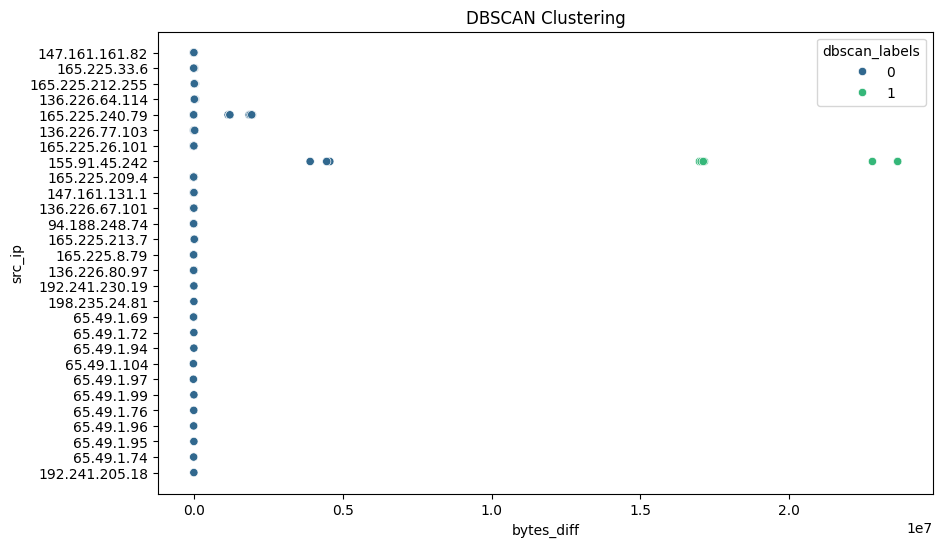

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='bytes_diff', y='src_ip', hue='kmeans_labels', data=df_filtered, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='bytes_diff', y='src_ip', hue='dbscan_labels', data=df_filtered, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()
